# Merging data frames, cleaning tweets data and compiling final data frame for analyses

In [1]:
# Initial imports
# import os
import pandas as pd
from pathlib import Path
import numpy as np
from datetime import date, timedelta
from matplotlib import pyplot

In [2]:
# Display all the text in columns
# pd.set_option('display.max_colwidth',None)
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

## Elon Musks Tweet Data
#### Start cleaning data frame for NLP and Tesla and SpaceX Flags

In [3]:
# Import csv file with tweets for elon musk
file_name='elon_tweets.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path,parse_dates=True, infer_datetime_format=True) # we do not do date as index just yet


# we change the name to date column - we will drop this field later. We need a date field that shows off market hour tweets as t+1 
tweets_df.rename(columns={'date':'date original'},inplace=True)
tweets_df['date original']=pd.to_datetime(tweets_df['date original'])

# Make tweets made after market hours fall into the following day
# Define market hour limit as everything after 16hs 00 min 00 sec
min_hour=16
min_minute=0
min_second=0

# we create the new field equalt to date original 
tweets_df['date']=tweets_df['date original'].copy()

# we add 1 day to date original if the tweet occured off market hours
tweets_df.loc[(tweets_df['date original'].dt.hour>=min_hour) & (tweets_df['date original'].dt.minute>min_minute) & (tweets_df['date original'].dt.second>min_second), 'date'] = tweets_df['date original']+timedelta(days=1)

# Drop original date and make the new date column as index
tweets_df.drop(columns={'date original'}, inplace=True)
tweets_df.set_index('date', inplace=True)

# We eliminate the seconds from Tweets data frame
tweets_df.index = tweets_df.index.date

# Create new data tweet with aggregated info
new_tweets_df=pd.DataFrame()
new_tweets_df['tweet'] = tweets_df['tweet'].groupby(tweets_df.index).agg(' '.join).sort_index()
new_tweets_df['tweet count']=tweets_df['tweet'].groupby(tweets_df.index).count().sort_index()
new_tweets_df['number likes']=tweets_df['nlikes'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number replies']=tweets_df['nreplies'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number retweets']=tweets_df['nretweets'].groupby(tweets_df.index).sum().sort_index()
tweets_df.head(20)

,tweet,nlikes,nreplies,nretweets
2021-01-18,@kellyreid The rate-limiting part or process in cell production is constantly changing,3120,256,119
2021-01-18,"@FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it.",8861,1566,938
2021-01-18,"@RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made",6115,336,463
2021-01-18,@lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human,8142,223,232
2021-01-18,"@OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys",5020,210,218
2021-01-18,Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem.,131699,5698,10424
2021-01-18,@p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in.,6171,625,274
2021-01-18,@tobyliiiiiiiiii @Erdayastronaut For sure,3852,106,79
2021-01-18,@Erdayastronaut Glad you’re ok,8142,114,150
2021-01-18,@Virgin_Orbit Congratulations!,4085,84,165


In [4]:
new_tweets_df.tail()

,tweet,tweet count,number likes,number replies,number retweets
2021-01-14,"@skorusARK Prototypes are easy, volume production is hard, positive cash flow is excruciating @Tesla Physics @Erdayastronaut Detanking &amp; inspections now. Good progress towards our “Hop in &amp; go to Mars!” goal. All three static fires completed &amp; no RUDs! @justpaulinelol @Erdayastronaut @SpaceX Wow, a lot has happened in 10 years! @OfficialJlipper Fair enough haha https://t.co/ho7yGXAS3a",7,559632,14544,38701
2021-01-15,"@SuperclusterHQ @w00ki33 Fallout New Texas @Breedlove22 @benmezrich Only Chuck Norris can divide by zero @Cerberu21014829 @Breedlove22 @benmezrich Good point @Breedlove22 @benmezrich The thing we call money is just an information system for labor allocation. What actually matters is making goods &amp; providing services. We should look at currencies from an information theory standpoint. Whichever has least error &amp; latency will win. Monty Python is amazing https://t.co/UJq94IWT88 @RationalEtienne @tobyliiiiiiiiii @Erdayastronaut They sure can twist the knife in that show! @tobyliiiiiiiiii @Erdayastronaut Probably wise @Erdayastronaut We’re making major improvements to ease of engine swap. Needs to be a few hours at most. @PPathole @johnkrausphotos @SpaceX Two of the engines need slight repairs, so will be switched out @johnkrausphotos @SpaceX Nice shot @realOmarAbdalah We don’t have high school internships, but please apply when you’re in college!",11,169339,9381,12439
2021-01-16,@DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai,6,127906,3605,4135
2021-01-17,@MrBeastYT I whistle,1,125897,1542,2171
2021-01-18,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one",11,199707,9709,13329


In [5]:
# Import csv file with tweets for elon musk
file_name='elon_tweets.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path,parse_dates=True, infer_datetime_format=True) # we do not do date as index just yet


# we change the name to date column - we will drop this field later. We need a date field that shows off market hour tweets as t+1 
tweets_df.rename(columns={'date':'date original'},inplace=True)
tweets_df['date original']=pd.to_datetime(tweets_df['date original'])

# Make tweets made after market hours fall into the following day
# Define market hour limit as everything after 16hs 00 min 00 sec
min_hour=16
min_minute=0
min_second=0

# we create the new field equalt to date original 
tweets_df['date']=tweets_df['date original'].copy()

# we add 1 day to date original if the tweet occured off market hours
tweets_df.loc[(tweets_df['date original'].dt.hour>=min_hour) & (tweets_df['date original'].dt.minute>min_minute) & (tweets_df['date original'].dt.second>min_second), 'date'] = tweets_df['date original']+timedelta(days=1)

# Drop original date and make the new date column as index
tweets_df.drop(columns={'date original'}, inplace=True)
tweets_df.set_index('date', inplace=True)

# We eliminate the seconds from Tweets data frame
tweets_df.index = tweets_df.index.date

# Cleaning tweets
# Multiple tweets per day in 1
#aggregate tweees, sum number of tweets per day, sumnumber of likes per tweet, etc
new_tweets_df = tweets_df.groupby(tweets_df.index).agg(' '.join).sort_index()
new_tweets_df['tweet count']=tweets_df['tweet'].groupby(tweets_df.index).count().sort_index()
new_tweets_df['tweet'] = tweets_df['tweet'].groupby(tweets_df.index).agg(' '.join).sort_index()
new_tweets_df['tweet count']=tweets_df['tweet'].groupby(tweets_df.index).count().sort_index()
new_tweets_df['number likes']=tweets_df['nlikes'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number replies']=tweets_df['nreplies'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number retweets']=tweets_df['nretweets'].groupby(tweets_df.index).sum().sort_index()



## Tesla and QQQ Stock Price Data
### Cleaning and Y generation

In [6]:
file_name='stock_price.csv'
file_path=Path(f"../Resources/{file_name}")
stock_price_df = pd.read_csv(file_path,index_col='date',parse_dates=True, infer_datetime_format=True)

# We create the Ys once the data frame is final

# We do the same format change to data  to make sure that the fields are comparable
stock_price_df.index = stock_price_df.index.date
stock_price_df.head(10)

,TSLA,QQQ,earnings flag
2010-06-29,4.778,39.031284,0
2010-06-30,4.766,38.437302,0
2010-07-01,4.392,38.329292,0
2010-07-02,3.840,38.221321,0
2010-07-06,3.222,38.338306,0
2010-07-07,3.160,39.562256,0
2010-07-08,3.492,39.778240,0
2010-07-09,3.480,40.156231,0
2010-07-12,3.410,40.273220,0
2010-07-13,3.628,40.795197,0


## Merging Dataframes
 * Stock Data + Raw Tweets 

In [7]:
# Join data frames. Outer is used to not leave any data point behind. 
 
merged_df=stock_price_df.join(new_tweets_df,how='outer')
merged_df.index = pd.to_datetime(merged_df.index)

# Keep data starting in Tesla's IPO
merged_df=merged_df.loc['2010-06-29':]

merged_df.tail()
# merged_df.loc['2011-12-01':'2011-12-06'].head(6)

,TSLA,QQQ,earnings flag,tweet,tweet count,number likes,number replies,number retweets
2021-01-16,NaN,NaN,NaN,@DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai,6.0,127906.0,3605.0,4135.0
2021-01-17,NaN,NaN,NaN,@MrBeastYT I whistle,1.0,125897.0,1542.0,2171.0
2021-01-18,NaN,NaN,NaN,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one",11.0,199707.0,9709.0,13329.0
2021-01-19,844.549988,316.410004,0.0,NaN,NaN,NaN,NaN,NaN
2021-01-20,850.450012,323.769989,0.0,NaN,NaN,NaN,NaN,NaN


## Cleaning Merged Data Frame
 * Move tweets to next trading day (i.e. push forward tweets made on weekends and holidays)

In [8]:
clean_df=merged_df.copy()

variable_df=clean_df['tweet'].copy

# weekend fix - tweets
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['tweet'].notnull(),clean_df['tweet'],'')
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['tweet'].shift(1),'')
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['NaN1'].shift(1),'')
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['NaN2'].shift(1),'')
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['NaN3'].shift(1),'')

clean_df['tweet clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()] 

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4'],inplace=True)


# weekend fix - tweet count; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['tweet count'].notnull(),clean_df['tweet count'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['tweet count'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['tweet count clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','tweet','tweet count'],inplace=True)




In [9]:
# weekend fix - number likes; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['number likes'].notnull(),clean_df['number likes'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['number likes'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['number likes clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','number likes'],inplace=True)


In [10]:
# weekend fix - number likes; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['number replies'].notnull(),clean_df['number replies'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['number replies'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['number replies clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','number replies'],inplace=True)

In [11]:
# weekend fix - number likes; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['number retweets'].notnull(),clean_df['number retweets'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['number retweets'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['number retweets clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','number retweets'],inplace=True)

In [12]:
# Add NaNs in empty strings
clean_df['tweet clean'].replace(r'^\s*$',np.NaN,inplace=True, regex=True)

# Drop weekends and holidays; i.e. days with no market data
clean_df.dropna(subset=['TSLA'],inplace=True)

clean_df.tail(3)

,TSLA,QQQ,earnings flag,tweet clean,tweet count clean,number likes clean,number replies clean,number retweets clean
2021-01-15,826.159973,311.859985,0.0,"@SuperclusterHQ @w00ki33 Fallout New Texas @Breedlove22 @benmezrich Only Chuck Norris can divide by zero @Cerberu21014829 @Breedlove22 @benmezrich Good point @Breedlove22 @benmezrich The thing we call money is just an information system for labor allocation. What actually matters is making goods &amp; providing services. We should look at currencies from an information theory standpoint. Whichever has least error &amp; latency will win. Monty Python is amazing https://t.co/UJq94IWT88 @RationalEtienne @tobyliiiiiiiiii @Erdayastronaut They sure can twist the knife in that show! @tobyliiiiiiiiii @Erdayastronaut Probably wise @Erdayastronaut We’re making major improvements to ease of engine swap. Needs to be a few hours at most. @PPathole @johnkrausphotos @SpaceX Two of the engines need slight repairs, so will be switched out @johnkrausphotos @SpaceX Nice shot @realOmarAbdalah We don’t have high school internships, but please apply when you’re in college!",11.0,169339.0,9381.0,12439.0
2021-01-19,844.549988,316.410004,0.0,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one @MrBeastYT I whistle @DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai",18.0,453510.0,14856.0,19635.0
2021-01-20,850.450012,323.769989,0.0,NaN,0.0,0.0,0.0,0.0


In [13]:
# Export clean tweets files to run NLP and SpaceX and Tesla Flags

save_csv=False

if save_csv==True:
    # Create clean data frame in the same format than the original
    clean_tweets_df=pd.DataFrame(clean_df['tweet clean'])
    clean_tweets_df.index.name='date'
    clean_tweets_df.rename(columns={'tweet clean':'tweet'},inplace=True)
    clean_tweets_df.head()
    print(a)
    # Save data frame in csv file
    file_name="clean_elon_tweets_vF.csv"
    output_file = Path(f"../Resources/{file_name}")
    clean_tweets_df.to_csv(f"{output_file}")

## NLP Analysis, Tokenizer and Ngrams / Frequency Analysis

### NLP Analysis

In [14]:
# Import additional libarires for NLP
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
nltk.download('vader_lexicon')
nltk.download('stopwords')
analyzer = SentimentIntensityAnalyzer()

# Imports additional libraries for Tokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import string

# Imports for Ngrams and frequency analysis
from collections import Counter
from nltk import ngrams
import inspect


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\carli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
tweets_data=pd.DataFrame(clean_df['tweet clean']).replace(np.nan, '', regex=True)
tweets_data.index.name='date'
tweets_data.reset_index(inplace=True)
tweets_data.rename(columns={'tweet clean':'tweet'},inplace=True)


In [16]:
# Functions for cleaning the raw tweet data
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(tweets):
    # remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    # remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    return tweets


In [17]:
# Add a column for cleaned tweets in original DataFrame
tweets_data['cleaned_tweet'] = clean_tweets(tweets_data['tweet'])

# Create a list of scores
scores = []

for i in range(tweets_data['cleaned_tweet'].shape[0]):
    try:
        compound = analyzer.polarity_scores(tweets_data['cleaned_tweet'][i])["compound"]
        pos = analyzer.polarity_scores(tweets_data['cleaned_tweet'][i])["pos"]
        neu = analyzer.polarity_scores(tweets_data['cleaned_tweet'][i])["neu"]
        neg = analyzer.polarity_scores(tweets_data['cleaned_tweet'][i])["neg"]
        
        scores.append({
            "Compound": compound, 
            "Positive": pos, 
            "Negative": neg, 
            "Neutral": neu
        })
    except AttributeError:
        pass
    

In [18]:
# Create the sentiment scores DataFrame
print("Sentiment Scores")
sentiment_scores = pd.DataFrame(scores)
print(sentiment_scores.tail())

print("")

# Describe the Tweet sentiment
print("Describe Sentiment")
print(sentiment_scores.describe())

Sentiment Scores
      Compound  Positive  Negative  Neutral
2654    0.5226     0.141     0.090    0.769
2655    0.9357     0.336     0.120    0.545
2656    0.9429     0.182     0.000    0.818
2657    0.9964     0.295     0.037    0.668
2658    0.0000     0.000     0.000    0.000

Describe Sentiment
          Compound     Positive     Negative      Neutral
count  2659.000000  2659.000000  2659.000000  2659.000000
mean      0.298098     0.104998     0.029586     0.431794
std       0.448002     0.148542     0.056031     0.395988
min      -0.959400     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.617000
75%       0.784500     0.181500     0.047000     0.789000
max       0.999700     1.000000     0.756000     1.000000


In [19]:
# Join Tweets DataFrame and sentiment scores DataFrame
def join_dataframes(df, df1):
    """Join Tweets DataFrame and sentiment scores DataFrame"""
    df = df.join(df1)
    return df

In [20]:
tweets_data = join_dataframes(tweets_data, sentiment_scores)
tweets_data.tail(2)

,date,tweet,cleaned_tweet,Compound,Positive,Negative,Neutral
2657,2021-01-19,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one @MrBeastYT I whistle @DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai","The rate-limiting part or process in cell production is constantly changing Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with about tunnels last week. If Governor &amp; Mayor want this done, we will do it. With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made Tegmark is an exceptionally smart &amp; good human The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. For sure Glad you’re ok Congratulations! This is a good one I whistle Cybertruck doesn’t need a garage It will be awesome Good point Your server-side code is doing too much Happy birthday Wikipedia! So glad you exist. Guess you been watching Cobra Kai",0.9964,0.295,0.037,0.668
2658,2021-01-20,,,0.0000,0.000,0.000,0.000


In [21]:
tweets_data['Sentiment']='neutral'
tweets_data.loc[tweets_data.Compound>0.5,'Sentiment']='positive'
tweets_data.loc[tweets_data.Compound<=-0.5,'Sentiment']='negative'

In [22]:
tweets_data['Sentiment'].value_counts()

neutral     1668
positive     929
negative      62
Name: Sentiment, dtype: int64

In [23]:
tweets_data.tail(2)

,date,tweet,cleaned_tweet,Compound,Positive,Negative,Neutral,Sentiment
2657,2021-01-19,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one @MrBeastYT I whistle @DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai","The rate-limiting part or process in cell production is constantly changing Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with about tunnels last week. If Governor &amp; Mayor want this done, we will do it. With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made Tegmark is an exceptionally smart &amp; good human The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. For sure Glad you’re ok Congratulations! This is a good one I whistle Cybertruck doesn’t need a garage It will be awesome Good point Your server-side code is doing too much Happy birthday Wikipedia! So glad you exist. Guess you been watching Cobra Kai",0.9964,0.295,0.037,0.668,positive
2658,2021-01-20,,,0.0000,0.000,0.000,0.000,neutral


In [24]:
# # Get dummy variables for Sentiment column
tweets_data['Sentiment'] = pd.get_dummies(tweets_data.Sentiment)
tweets_data.dtypes
# Positive and Neutral =0 
# Negative =1

date             datetime64[ns]
tweet                    object
cleaned_tweet            object
Compound                float64
Positive                float64
Negative                float64
Neutral                 float64
Sentiment                 uint8
dtype: object

In [25]:
tweets_data['Sentiment'].value_counts()
 

0    2597
1      62
Name: Sentiment, dtype: int64

### Tokenizer

In [26]:
# Call lemmatizer and word addons
lemmatizer = WordNetLemmatizer()
sw_addon = stopwords.words('english')
sw_addon.append("u")
sw_addon.append("it'")
sw_addon.append("char")
sw_addon.append("’")
sw_addon.append("…")
sw_addon.append("”")
sw_addon.append('“')
sw_addon.append('”')
sw_addon.append('amp')
sw_addon.append('would')
sw_addon.append("n't")
sw_addon.append('wo')
sw_addon = set(sw_addon)

In [27]:
# Tokenize tweets
def tokenizer(text):
    """Tokenizes text."""   
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))   
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))   
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw_addon, words))   
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]  
    return tokens


In [28]:
# Add the tokens column to the Tweets DataFrame
tweets_data["tokens"] = tweets_data.cleaned_tweet.apply(tokenizer)
tweets_data.tail(2)

,date,tweet,cleaned_tweet,Compound,Positive,Negative,Neutral,Sentiment,tokens
2657,2021-01-19,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one @MrBeastYT I whistle @DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai","The rate-limiting part or process in cell production is constantly changing Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with about tunnels last week. If Governor &amp; Mayor want this done, we will do it. With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made Tegmark is an exceptionally smart &amp; good human The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. For sure Glad you’re ok Congratulations! This is a good one I whistle Cybertruck doesn’t need a garage It will be awesome Good point Your server-side code is doing too much Happy birthday Wikipedia! So glad you exist. Guess you been watching Cobra Kai",0.9964,0.295,0.037,0.668,0,"[rate-limiting, part, process, cell, production, constantly, changing, Cars, truck, stuck, traffic, generate, megaton, toxic, gas, particulate, road, tunnel, Miami, solve, traffic, example, world, Spoke, tunnel, last, week, Governor, Mayor, want, done, giant, casting, machine, literally, trying, make, full-size, car, way, toy, car, made, Tegmark, exceptionally, smart, good, human, best, manufacturing, technology, ultra, high, volume, industry, like, food, beverage, medical, eg, syrinx, toy, Battery, cell, production, fundamental, rate-limiter, slowing, sustainable, energy, future, important, problem, Looking, question, FSD, viewed, reasonably, valuable, trade-in, sure, Glad, ok, Congratulations, good, one, whistle, Cybertruck, need, garage, awesome, Good, point, server-side, code, much, Happy, birthday, Wikipedia, glad, ...]"
2658,2021-01-20,,,0.0000,0.000,0.000,0.000,0,[]


In [29]:
tweets_data['Sentiment'].value_counts()

0    2597
1      62
Name: Sentiment, dtype: int64

### NGrams and Frequency Analysis

In [30]:
def seriesToList(s):
    """"Converts series into one list"""
    
    lst = []        
    for ele in s:  
        lst += ele 
    return lst

# Convert Tokens column in Tweets DataFrame into one list
tweets = seriesToList(tweets_data["tokens"])


In [31]:
# Create bigrams
print("Bigrams")
bigrams = ngrams(tweets, n=2)
tweets_dict = dict(Counter(bigrams).most_common(15))
tweets_bigrams = tweets_dict.items()
display(list(tweets_bigrams))

print("")
# Create unigrams
print("Unigrams")
unigrams = ngrams(tweets, n=1)
tweets_dict = dict(Counter(unigrams).most_common(15))
tweets_unigrams = tweets_dict.items()
display(list(tweets_unigrams))

Bigrams


[(('Model', '3'), 174),
 (('Falcon', '9'), 67),
 (('next', 'week'), 59),
 (('next', 'year'), 56),
 (('coming', 'soon'), 48),
 (('Model', 'X'), 47),
 (('Falcon', 'Heavy'), 47),
 (('Good', 'point'), 41),
 (('Coming', 'soon'), 40),
 (('year', 'ago'), 39),
 (('Boring', 'Company'), 37),
 (('Tesla', 'Model'), 35),
 (('Pretty', 'much'), 33),
 (('next', 'month'), 33),
 (('Tesla', 'owner'), 32)]


Unigrams


[(('Tesla',), 1041),
 (('car',), 537),
 (('Yes',), 471),
 (('Model',), 393),
 (('year',), 389),
 (('like',), 387),
 (('time',), 329),
 (('make',), 311),
 (('good',), 308),
 (('3',), 302),
 (('much',), 287),
 (('need',), 277),
 (('one',), 256),
 (('great',), 250),
 (('rocket',), 249)]

In [32]:
def token_count(tokens, N=15):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)


In [33]:
# Rename data frame into Vader_Sentiment
vader_sentiment_df=pd.DataFrame(tweets_data)
vader_sentiment_df.index.name='date'

# Rename columns to conform to style in final data frame
vader_sentiment_df.rename(columns={'cleaned_tweet':'cleaned tweet','Compound':'compound','Positive':'positive','Negative':'negative','Neutral':'neutral','Sentiment':'sentiment'}, inplace=True)

# rename clean tweets in clean_df to tweets raw
clean_df.rename(columns={'tweet clean':'tweet raw'},inplace=True)

# Drop columns already included in 'master' data frame
vader_sentiment_df.drop(columns={'tweet'}, inplace=True)

vader_sentiment_df.head(1)





,date,cleaned tweet,compound,positive,negative,neutral,sentiment,tokens
date,,,,,,,,
0,2010-06-29,,0.0,0.0,0.0,0.0,0,[]


## Continue clenaing and Merging

In [34]:
# Merge NLP dataframe with rest of fields
clean_df=clean_df.join(vader_sentiment_df,how='outer')


In [35]:
clean_df.head(1)

,TSLA,QQQ,earnings flag,tweet raw,tweet count clean,number likes clean,number replies clean,number retweets clean,date,cleaned tweet,compound,positive,negative,neutral,sentiment,tokens
date,,,,,,,,,,,,,,,,
2010-06-29 00:00:00,4.778,39.031284,0.0,NaN,0.0,0.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# #Import CSV with vader sentiment score
# file_name='tokens_n_vader_sentiment.csv'
# file_path=Path(f"../Resources/{file_name}")
# vader_sentiment_df = pd.read_csv(file_path,index_col='date',parse_dates=True, infer_datetime_format=True) # we do not do date as index just yet

# # Rename columns to conform to style in final data frame
# vader_sentiment_df.rename(columns={'cleaned_tweet':'cleaned tweet','Compound':'compound','Positive':'positive','Negative':'negative','Neutral':'neutral','Sentiment':'sentiment'}, inplace=True)

# # rename clean tweets in clean_df to tweets raw
# clean_df.rename(columns={'tweet clean':'tweet raw'},inplace=True)

# # Drop columns already included in 'master' data frame
# vader_sentiment_df.drop(columns={'tweet'}, inplace=True)

# vader_sentiment_df.head(1)


# # Merge NLP dataframe with rest of fields
# clean_df=clean_df.join(vader_sentiment_df,how='outer')



# 

## Key Words Flags

In [37]:
clean_df.iloc[0]

TSLA                       4.778
QQQ                      39.0313
earnings flag                  0
tweet raw                    NaN
tweet count clean              0
number likes clean             0
number replies clean           0
number retweets clean          0
date                         NaT
cleaned tweet                NaN
compound                     NaN
positive                     NaN
negative                     NaN
neutral                      NaN
sentiment                    NaN
tokens                       NaN
Name: 2010-06-29 00:00:00, dtype: object

In [38]:
# We create function to search if words in cleaned tweet are included in the keyword lists

# Funciton to search word(s)
# Discuss how to fix lanch and luanchpad confusion:i.e. full words
def get_word_match(my_column,target_word):
    if target_word.lower() in my_column.lower():
        return 1
    else:
        return 0

# Define key words informed by our analysis of tweets
keywords_double = ['model 3', 'coming soon', 'next week', 'next year', 'falcon 9', 'falcon heavy', 
            'model x', 'next month', 'space station', 'sustainable energy', 'electric car', 'climate change', 
            'software update', 'dual motor', 'self-driving', 'giga berlin', 'solar power']

keywords_single = ['launch', 'production', 'starship', 'mars', 'time', 'rocket', 'engine', 'soon', 'tesla', 'spacex']

combined_keywords= keywords_double+keywords_single

# Make sure that the words are all lower case. 

keywords_double=[x.lower() for x in keywords_double]
keywords_single=[x.lower() for x in keywords_single]

# create the new 1/0 columns. One for each keyword

for word in combined_keywords:
    clean_df[word]=clean_df['cleaned tweet'].astype('str').apply(get_word_match, args=[word])

    
# Create a column that shows the number of keywords in a day. Field capturing relative strength.
clean_df['keyword strength']=0
for word in combined_keywords:
    clean_df['keyword strength']+=clean_df[word]

# Create all keyword 1/0 flag. If there is any keyword in tweets on a given day, then 1 else 0
clean_df['keyword flag']=np.where(clean_df['keyword strength']>0,1,0)



In [39]:
clean_df.iloc[0]

TSLA                       4.778
QQQ                      39.0313
earnings flag                  0
tweet raw                    NaN
tweet count clean              0
number likes clean             0
number replies clean           0
number retweets clean          0
date                         NaT
cleaned tweet                NaN
compound                     NaN
positive                     NaN
negative                     NaN
neutral                      NaN
sentiment                    NaN
tokens                       NaN
model 3                        0
coming soon                    0
next week                      0
next year                      0
falcon 9                       0
falcon heavy                   0
model x                        0
next month                     0
space station                  0
sustainable energy             0
electric car                   0
climate change                 0
software update                0
dual motor                     0
self-drivi

## Continue clenaing and Merging - Finalizing Final Data Frame 

In [40]:
# Creating Y variables
clean_df['Y_d1_pr_change_diff']=clean_df['TSLA'].pct_change()-clean_df['QQQ'].pct_change()
clean_df['Y_d5_pr_change_diff']=clean_df['TSLA'].pct_change(periods=5)-clean_df['QQQ'].pct_change(periods=5)

# Creating 1 / 0 flag for tweet made
clean_df['tweet flag']=np.where(clean_df['tweet raw'].notnull(),1,0) 

# renaming fields
clean_df.rename(columns={'tweet count clean':'tweet count','number likes clean':'number likes','number replies clean':'number replies','number replies clean':'number replies'},inplace=True)


# create function to ore arrange order automatically
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    return(df[seg1 + seg2 + seg3])

# move y variables to the beginning right after columns that will not be used
clean_df = movecol(clean_df,cols_to_move=['Y_d1_pr_change_diff', 'Y_d5_pr_change_diff'],ref_col='QQQ',place='After')

# move tweet related variables to the beginning. These are for referene and should not be included in machine learning
clean_df = movecol(clean_df,cols_to_move=['tokens', 'cleaned tweet', 'tweet raw'],ref_col='QQQ',place='After')


# When there is no tweet, make vader sentiment score of 0 null [CARLOS: JEFF]
# clean_df[['compound','positive','negative','neutral']]=np.where(clean_df['tweet'].isnull(),np.NaN)


# Re order the data frame
# clean_df=clean_df[['TSLA','QQQ','Y_d1_pr_change_diff','Y_d5_pr_change_diff','earnings flag','tweet count', 'tweet flag','compound','positive','negative','neutral','tesla flag','spacex flag']]

In [41]:
clean_df.head()

,TSLA,QQQ,tokens,cleaned tweet,tweet raw,Y_d1_pr_change_diff,Y_d5_pr_change_diff,earnings flag,tweet count,number likes,number replies,number retweets clean,date,compound,positive,negative,neutral,sentiment,model 3,coming soon,next week,next year,falcon 9,falcon heavy,model x,next month,space station,sustainable energy,electric car,climate change,software update,dual motor,self-driving,giga berlin,solar power,launch,production,starship,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-29 00:00:00,4.778,39.031284,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-06-30 00:00:00,4.766,38.437302,NaN,NaN,NaN,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-07-01 00:00:00,4.392,38.329292,NaN,NaN,NaN,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-07-02 00:00:00,3.840,38.221321,NaN,NaN,NaN,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-07-06 00:00:00,3.222,38.338306,NaN,NaN,NaN,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
clean_df.rename(columns={'earnings flag':'quarterly report announcement flag'},inplace=True)

clean_df.drop(columns={'tokens', 'cleaned tweet', 'tweet raw'}, inplace=True)

# Export csv files with final data frame for machine learning
save_csv=False
if save_csv==True:
    file_name="final_data_frame.csv"
    output_file = Path(f"../Resources/{file_name}")
    clean_df.to_csv(f"{output_file}")

# Word Clouds - Create chart for readme and presentation

In [43]:
# Imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


In [44]:
keywords = ['model_3', 'model_x', 'coming_soon', 'next_week',
            'next_year', 'sustainable_energy',  'climate_change',
            'giga_berlin', 'falcon_9', 'falcon_heavy', 'next_month', 
            'space_station', 'electric_car', 'software_update', 
            'dual_motor', 'self_driving', 'rocket', 'engine', 
            'solar_power', 'SpaceX', 'launch', 'production', 
            'starship', 'mars', 'time', 'soon', 'tesla'
           ]

keywords1 = ['launch', 'production', 'starship', 
             'mars', 'time', 'rocket', 
             'soon', 'tesla', 'spacex'
            ]

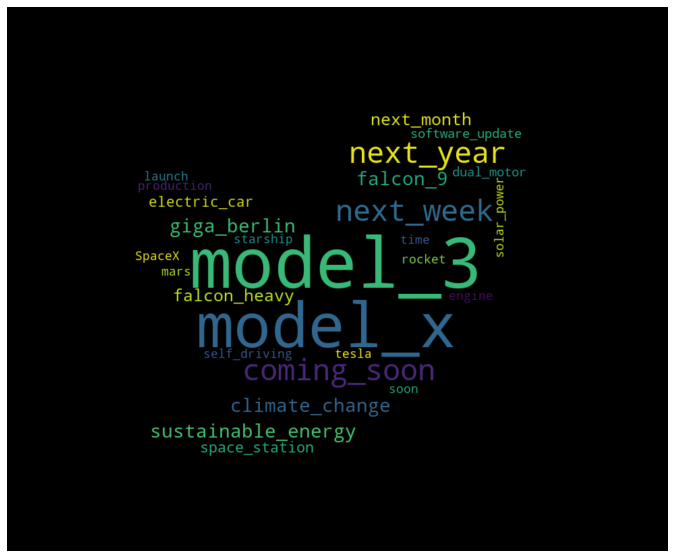

In [45]:
# Load the image
wave_mask = np.array(Image.open("twitter.jpg"))

# Generate the Tweet word cloud
keywords = ' '.join(keywords)
wc = WordCloud(mask=wave_mask).generate(keywords)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()